In [1]:
!pip install -U ppscore

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=c99d3584319756a0cfca290d64ad2d41ce625f728c0851543ccb10ddaeeea7bb
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [2]:
import pandas as pd
import numpy as np
import ppscore as pps

In [3]:
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

In [4]:
pps.score(df, "x", "y")

{'baseline_score': 1.0087024516178982,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'model_score': 0.332928923157672,
 'ppscore': 0.6699433786210454,
 'x': 'x',
 'y': 'y'}

In [5]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.669943,regression,True,mean absolute error,1.008702,0.332929,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
1,error,y,0.000000,regression,True,mean absolute error,1.008702,1.299177,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


In [6]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.250920,0.332902,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,x,y,0.669943,regression,True,mean absolute error,1.008702,0.332929,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,error,x,0.000000,regression,True,mean absolute error,0.982637,1.331741,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.008702,1.299177,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
6,y,x,0.000000,regression,True,mean absolute error,0.982637,1.087720,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
7,y,error,0.000000,regression,True,mean absolute error,0.250920,0.279597,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


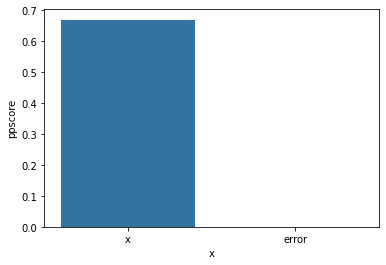

In [7]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

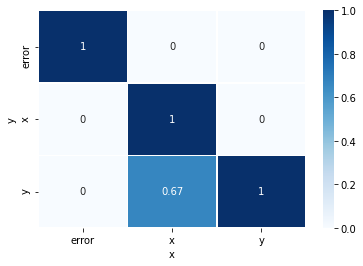

In [8]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)